In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing CSV File.

In [2]:
# I have given the path between the single quotes(below) you can change it accordingly.

df = pd.read_csv('G:/DOCUMENTS/Airlinewise Monthly International Air Traffic To And From The Indian Territory.csv')

### Renaming Columns.

In [3]:
# Changing column's name 'CARRIER TYPE' to 'CARRIER_TYPE'(below) and others as mentioned below and showing top 10 rows.

df = df.rename({'CARRIER TYPE':'CARRIER_TYPE','AIRLINE NAME':'AIRLINE_NAME','PASSENGERS TO INDIA':'PASSENGERS_TO_INDIA', 'PASSENGERS FROM INDIA':'PASSENGERS_FROM_INDIA'}, axis='columns')
df.head(10)

,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680
5,2015,JAN,Q1,AEROFLOT,FOREIGN,5088.0,6901,7.581,199.696
6,2015,JAN,Q1,AEROLOGIC,FOREIGN,0.0,0,1.409,1.235
7,2015,JAN,Q1,AIR ARABIA,FOREIGN,77405.0,79096,191.549,1096.201
8,2015,JAN,Q1,AIR ASIA BERHAD,FOREIGN,25906.0,27950,33.524,307.431
9,2015,JAN,Q1,AIR AUSTRAL,FOREIGN,0.0,0,0.000,0.000


### Filling zero in place of NaNs.

In [4]:
# Replacing null values(NaNs) with zeros and showing top five rows.

df = df.fillna(0)
df.head()

,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680


### Making a new column.

In [5]:
df['Total_Passengers'] = df.iloc[:, 5:7].sum(axis=1)
df.head()

,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,533096.0
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,212181.0
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,142324.0
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,652969.0
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,80350.0


### Grouping by Years.

In [6]:
df.groupby('YEAR').sum()

,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers
YEAR,,,,,
2015,23781640.0,24858956,560737.27196,887775.4163,48640596.0
2016,26543689.0,27122472,570518.70000,893202.2000,53666161.0
2017,6778304.0,7424671,154621.10000,238545.9000,14202975.0


## Passengers from India vs Passengers to India.

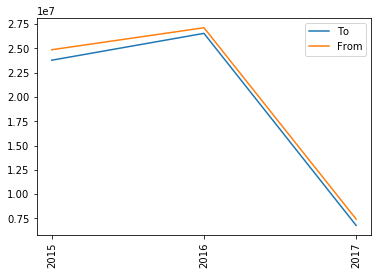

In [7]:
results = df.groupby('YEAR').sum()

# Making a range 2015 to 2018 with increment of 1.
year = np.arange(2015,2018)

plt.plot(year, results['PASSENGERS_TO_INDIA'], label = 'To')

# Fixing the scale of x-axis and rotating the scale values.
plt.xticks(np.arange(2015,2018), rotation='vertical')

plt.plot(year, results['PASSENGERS_FROM_INDIA'], label = 'From')
plt.legend()
plt.show()

### Grouping by Airline Name.

In [8]:
df1 = df.groupby('AIRLINE_NAME').sum()
df1.head()

,YEAR,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers
AIRLINE_NAME,,,,,,
AEROFLOT,54423,194356.0,210052,526.952,5425.072,404408.0
AEROLOGIC,54423,0.0,0,71.486,549.440,0.0
AIR ARABIA,54423,1964928.0,2031394,2996.604,29382.071,3996322.0
AIR ASIA BERHAD,54423,735850.0,717993,1412.979,8481.998,1453843.0
AIR ASIA X,30243,66188.0,69238,2302.500,2863.400,135426.0


## Which are the Air Lines that are mostly used?

### Sorting in Descending order.

In [9]:
df1 = df1.sort_values('Total_Passengers',ascending=False).head()
df1

,YEAR,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers
AIRLINE_NAME,,,,,,
JET AIRWAYS,54423,8320544.0,8471096,116453.19897,169026.80005,16791640.0
AIR INDIA,54423,6417414.0,6495056,101273.51800,137342.86200,12912470.0
EMIRATES AIRLINE,54423,5981862.0,6214850,140917.98000,347591.80500,12196712.0
AIR INDIA EXPRESS,54423,3099689.0,3433720,1543.66900,11700.50500,6533409.0
ETIHAD AIRLINES,54423,2715962.0,2813097,31049.13500,107152.41300,5529059.0


In [10]:
df.head()

,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,533096.0
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,212181.0
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,142324.0
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,652969.0
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,80350.0


In [11]:
df1.head()

,YEAR,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers
AIRLINE_NAME,,,,,,
JET AIRWAYS,54423,8320544.0,8471096,116453.19897,169026.80005,16791640.0
AIR INDIA,54423,6417414.0,6495056,101273.51800,137342.86200,12912470.0
EMIRATES AIRLINE,54423,5981862.0,6214850,140917.98000,347591.80500,12196712.0
AIR INDIA EXPRESS,54423,3099689.0,3433720,1543.66900,11700.50500,6533409.0
ETIHAD AIRLINES,54423,2715962.0,2813097,31049.13500,107152.41300,5529059.0


## Passengers From India vs To India according to Air Lines.

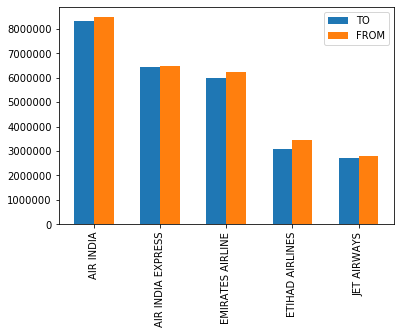

In [22]:
N = 5
ind = np.arange(N)
width = 0.3

# Making a list of name of Airlines present in df1 and storing them in 'AirlineName'.
AirlineName = [AIRLINE_NAME for AIRLINE_NAME, df2 in df1.groupby('AIRLINE_NAME')]

plt.bar(ind, df1['PASSENGERS_TO_INDIA'],width, label='TO')
plt.bar(ind+width, df1['PASSENGERS_FROM_INDIA'],width, label='FROM')

plt.xticks(ind + width / 2, AirlineName, rotation = 'vertical')
plt.legend()

plt.show()

### Grouping by Carrier Type.

In [13]:
df2 = df.groupby('CARRIER_TYPE').sum()
df2.head()

,YEAR,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers
CARRIER_TYPE,,,,,,
DOMESTIC,272115,21305053.0,22065392,2.241534e+05,3.551726e+05,43370445.0
FOREIGN,4432527,35798580.0,37340707,1.061724e+06,1.664351e+06,73139287.0


## Which type of flights are mostly used?(Domestic or Foreign)

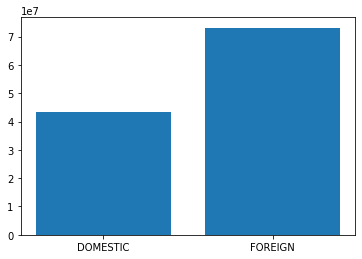

In [14]:
# Making a list of carrier types and storing them in 'CarrierType'.
CarrierType = [CARRIER_TYPE for CARRIER_TYPE, df3 in df2.groupby('CARRIER_TYPE')]

plt.bar(CarrierType, df2['Total_Passengers'])
plt.show()

### Grouping by Quarter.

In [15]:
df3 = df.groupby('QUARTER').sum()
df3.head()

,YEAR,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers
QUARTER,,,,,,
Q1,1596708,18834064.0,20672324,415228.75570,668144.74750,39506388.0
Q2,1015824,12398212.0,13052124,275914.40936,446150.52842,25450336.0
Q3,1021869,12226961.0,12867001,296275.44776,425094.38712,25093962.0
Q4,1070241,13644396.0,12814650,298458.45914,480133.85326,26459046.0


## Which Quarter of the Year Airplanes are most used?

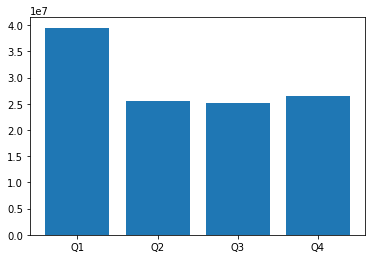

In [16]:
quarter = np.array(['Q1','Q2','Q3','Q4'])

plt.bar(quarter, df3['Total_Passengers'])
plt.show()